In [1]:
import numpy as np 
from brian2tools import *
from tools.helpers import *
from tools.srbm_reconstruction import *
import matplotlib.pyplot as plt

In [2]:
""" date = '2023-04-13' # working pretty well
time = '23-12' """

date = '2023-04-17'
time = '00-34'

W, Wvh, Wch, mBv, mBh, b_c, b_v, b_h, mB = load_matrices(date, time)


Matrices loaded from output/output/2023-04-13/23-12//


In [3]:
data =  mnist_data = load_MNIST(n_samples = 1, min_p = 1e-4, max_p = .9999, binary = True, seed = None)

In [4]:
hacked_digit = create_single_Id(idx = 0, data = data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                                beta_parameter = beta_parameter, mult_class=0.0,mult_data=1.0)
hacked_digit[:N_v].reshape(28,28)[:,:14] = 0.
cl = np.zeros(N_c)
cl[int(0*n_c_unit):int(1*n_c_unit)] = .98
cl[int(6*n_c_unit):int(7*n_c_unit)] = .98
hacked_digit[N_v:]= clamped_input_transform(cl, min_p = 1e-16, max_p = .500+.2e-9)

Ids_demo = np.load('data/ids.npy')
Ids = np.column_stack([
    create_single_Id(3, data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0) * 0,
    create_single_Id(1, data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0),
    create_single_Id(1, data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 1.0, mult_data = 0.0),
    hacked_digit,
    ]).T

#Ids[-1,:N_v] = Ids_demo[-1,:N_v]
#Ids[1,:N_v] = Ids_demo[1,:N_v]

In [5]:
out = main(W, b_v, b_c, b_h, Id = Ids, monitors = True)
Mh, Mv, Mc= out['Mh'], out['Mv'], out['Mc']

Creating equation


INFO:root:creating /var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_6s4nzi5q/var
INFO:root:creating /var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_6s4nzi5q/var/folders
INFO:root:creating /var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_6s4nzi5q/var/folders/07
INFO:root:creating /var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_6s4nzi5q/var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn
INFO:root:creating /var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_6s4nzi5q/var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T
INFO:root:creating /var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_6s4nzi5q/var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_6s4nzi5q
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/include -arch arm64 -fPIC -O2 -isystem /opt/homebrew

1.7521891593933105


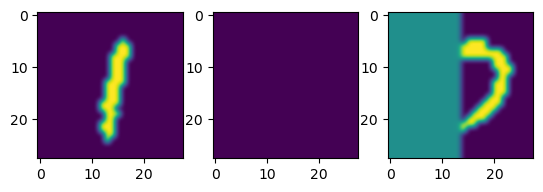

In [6]:
plot_id1=np.array(Ids[1][0:784]).reshape(28,28)
plot_id2=np.array(Ids[2][0:784]).reshape(28,28)
plot_id3=np.array(Ids[3][0:784]).reshape(28,28)

fig, (axs1, axs2, axs3) = plt.subplots(1, 3)
axs1.imshow(plot_id1, interpolation = 'bicubic')
axs2.imshow(plot_id2, interpolation = 'bicubic') 
axs3.imshow(plot_id3, interpolation = 'bicubic') 

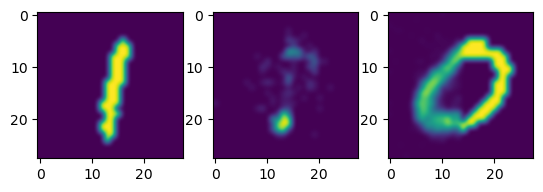

In [7]:
input = np.array(spike_histogram(Mv,T1_s+10*t_ref,T1_e)).T[1].reshape(28,28)
dream = np.array(spike_histogram(Mv,T2_s+60*t_ref,T2_e)).T[1].reshape(28,28)
completion = np.array(spike_histogram(Mv,T3_s+15*t_ref,T3_e)).T[1].reshape(28,28)


fig, (axs1, axs2, axs3) = plt.subplots(1, 3)
axs1.imshow(input, interpolation = 'bicubic')
axs2.imshow(dream, interpolation = 'bicubic')
axs3.imshow(completion, interpolation = 'bicubic')


WARNING    /opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/lib/python3.9/site-packages/brian2tools/plotting/data.py:59: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  axes.plot(spike_times/time_unit, spike_indices, '.', **kwds)
 [py.warnings]
  axes.plot(spike_times/time_unit, spike_indices, '.', **kwds)



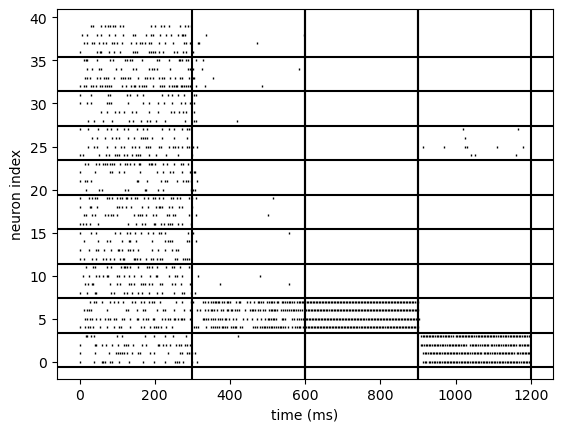

In [8]:

plot_raster(Mc.i, Mc.t, markersize=2,marker='|', color='k', mew=1)
for i in range(n_classes):
    axhline(-0.6+float(i)*4, color='k')
axvline(T1_s/second*1000, color='k')
axvline(T1_e/second*1000, color='k')
axvline(T2_s/second*1000, color='k')
axvline(T2_e/second*1000, color='k')
axvline(T3_s/second*1000, color='k')
axvline(T3_e/second*1000, color='k')

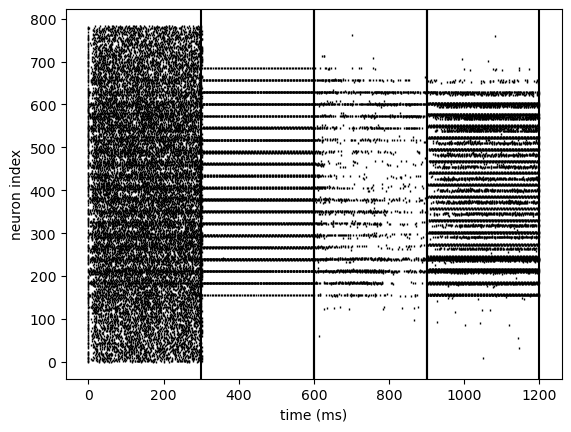

In [9]:
plot_raster(Mv.i, Mv.t, markersize=2,marker='|', color='k', mew=1)
axvline(T1_s/second*1000, color='k')
axvline(T1_e/second*1000, color='k')
axvline(T2_s/second*1000, color='k')
axvline(T2_e/second*1000, color='k')
axvline(T3_s/second*1000, color='k')
axvline(T3_e/second*1000, color='k')